<a href="https://colab.research.google.com/github/skipword/IAProject/blob/main/Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import tensorflow as tf


In [2]:
#Conectarse a Drive
import os
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/Proyecto IA/')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Proyecto IA


# Ordenar datos

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Proyecto IA/Evaluaciones_Agropecuarias_Primero.csv");
df.head(5)

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


In [4]:
df.describe()

,CÓD. \nDEP.,CÓD. MUN.,AÑO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha)
count,206068.000000,206068.000000,206068.000000,206068.000000,206068.000000,2.060680e+05,202635.000000
mean,40.322563,40747.534066,2012.455976,291.073825,249.419522,2.790726e+03,9.238820
std,25.278662,25256.621906,3.479113,1153.602556,980.375226,4.511471e+04,14.888659
min,5.000000,5001.000000,2006.000000,0.000000,0.000000,0.000000e+00,0.030000
25%,17.000000,17524.000000,2009.000000,10.000000,8.000000,3.200000e+01,1.500000
50%,41.000000,41357.000000,2013.000000,35.000000,30.000000,1.400000e+02,5.000000
75%,68.000000,68001.000000,2015.000000,151.000000,130.000000,6.480000e+02,11.230000
max,99.000000,99773.000000,2018.000000,47403.000000,38600.000000,4.546116e+06,246.000000


In [5]:

df.columns = ['COD_DEP', 'DEPARTAMENTO', 'COD_MUN','MUNICIPIO','GRUPO','SUBGRUPO',
              'CULTIVO','SISTEMA_PRODUCTIVO','AÑO','PERIODO','Area_Sembrada',
              'Area_Cosechada','Produccion','Rendimiento','ESTADO_FISICO',
              'NOMBRE_CIENTIFICO','CICLO DE CULTIVO']
print(df.columns)
df.head()

Index(['COD_DEP', 'DEPARTAMENTO', 'COD_MUN', 'MUNICIPIO', 'GRUPO', 'SUBGRUPO',
       'CULTIVO', 'SISTEMA_PRODUCTIVO', 'AÑO', 'PERIODO', 'Area_Sembrada',
       'Area_Cosechada', 'Produccion', 'Rendimiento', 'ESTADO_FISICO',
       'NOMBRE_CIENTIFICO', 'CICLO DE CULTIVO'],
      dtype='object')


,COD_DEP,DEPARTAMENTO,COD_MUN,MUNICIPIO,GRUPO,SUBGRUPO,CULTIVO,SISTEMA_PRODUCTIVO,AÑO,PERIODO,Area_Sembrada,Area_Cosechada,Produccion,Rendimiento,ESTADO_FISICO,NOMBRE_CIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


In [6]:
grupo_encoder = LabelEncoder()
subgrupo_encoder = LabelEncoder()
cultivo_encoder = LabelEncoder()
region_encoder = LabelEncoder()
df['Grupo_encoded'] = grupo_encoder.fit_transform(df['GRUPO'])
df['Subgrupo_encoded'] = subgrupo_encoder.fit_transform(df['SUBGRUPO'])
df['Cultivo_encoded'] = cultivo_encoder.fit_transform(df['CULTIVO'])
grupo_mapping = pd.DataFrame({'GRUPO': grupo_encoder.classes_, 'Grupo_encoded': range(len(grupo_encoder.classes_))})
subgrupo_mapping = pd.DataFrame({'SUBGRUPO': subgrupo_encoder.classes_, 'Subgrupo_encoded': range(len(subgrupo_encoder.classes_))})
cultivo_mapping = pd.DataFrame({'CULTIVO': cultivo_encoder.classes_, 'Cultivo_encoded': range(len(cultivo_encoder.classes_))})
print("Mapeo de Grupos:")
print(grupo_mapping)
print("\nMapeo de Subgrupos:")
print(subgrupo_mapping)
print("\nMapeo de Cultivos:")
print(cultivo_mapping)

Mapeo de Grupos:
                                               GRUPO  Grupo_encoded
0                                           CEREALES              0
1                                             FIBRAS              1
2                                  FLORES Y FOLLAJES              2
3                                         FORESTALES              3
4                                           FRUTALES              4
5                                             HONGOS              5
6                                         HORTALIZAS              6
7                                        LEGUMINOSAS              7
8                                        OLEAGINOSAS              8
9                                  OTROS PERMANENTES              9
10                                OTROS TRANSITORIOS             10
11  PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES             11
12                             TUBERCULOS Y PLATANOS             12

Mapeo de Subgrupos:
      SUBG

In [7]:
columnas_interes = ['COD_DEP', 'COD_MUN','Grupo_encoded',
                    'Subgrupo_encoded','Cultivo_encoded','Area_Sembrada',
                    'Area_Cosechada','Produccion','Rendimiento']
df_seleccionado = df[columnas_interes]
df_seleccionado.head()

,COD_DEP,COD_MUN,Grupo_encoded,Subgrupo_encoded,Cultivo_encoded,Area_Sembrada,Area_Cosechada,Produccion,Rendimiento
0,15,15114,6,0,0,2,1,1,1.00
1,25,25754,6,0,0,82,80,1440,18.00
2,25,25214,6,0,0,2,2,26,17.33
3,54,54405,6,0,0,3,3,48,16.00
4,54,54518,6,0,0,1,1,5,10.00


In [8]:
df_seleccionado['Rendimiento'] = df_seleccionado['Produccion'] / df_seleccionado['Area_Cosechada']

df_seleccionado.head()

<ipython-input-8-750be87bfb18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Rendimiento'] = df_seleccionado['Produccion'] / df_seleccionado['Area_Cosechada']


,COD_DEP,COD_MUN,Grupo_encoded,Subgrupo_encoded,Cultivo_encoded,Area_Sembrada,Area_Cosechada,Produccion,Rendimiento
0,15,15114,6,0,0,2,1,1,1.0
1,25,25754,6,0,0,82,80,1440,18.0
2,25,25214,6,0,0,2,2,26,13.0
3,54,54405,6,0,0,3,3,48,16.0
4,54,54518,6,0,0,1,1,5,5.0


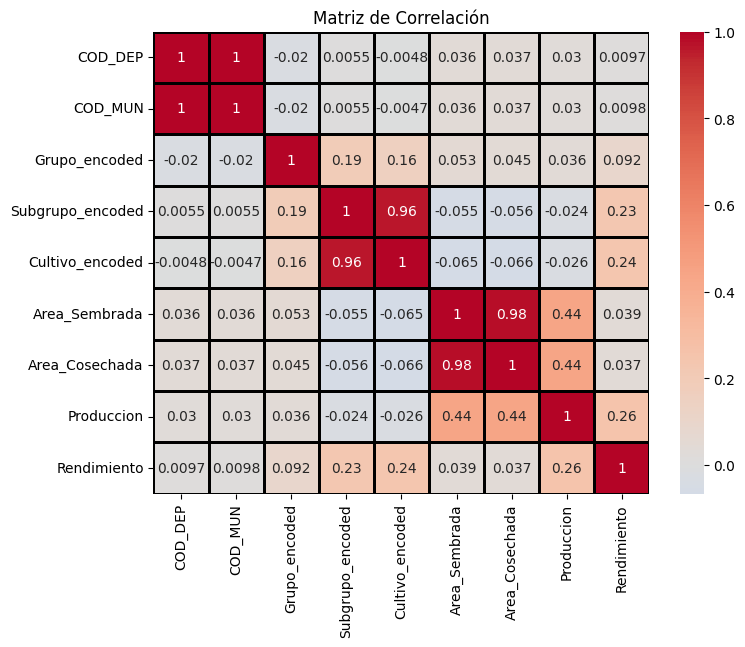

In [9]:
df_numerico = df_seleccionado.select_dtypes(include=['int64', 'float64'])


correlation_matrix = df_numerico.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title('Matriz de Correlación')
plt.show()

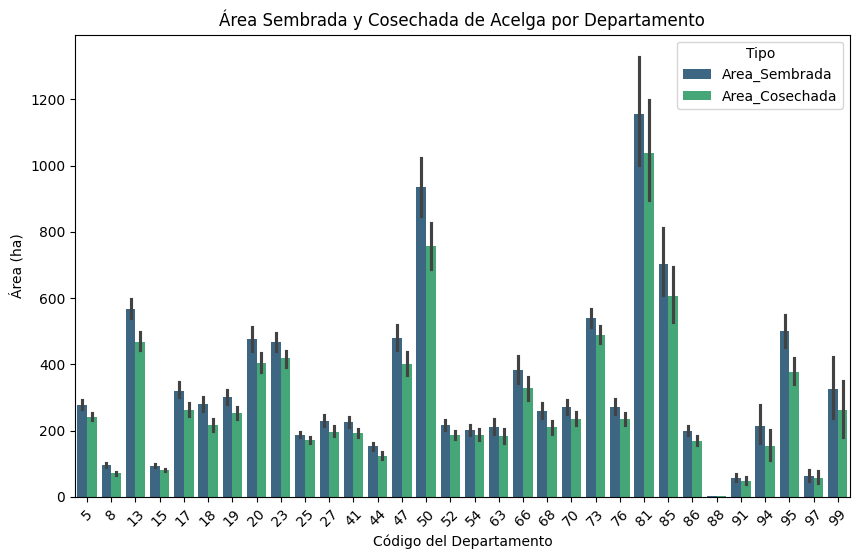

In [10]:
df_melted = df.melt(id_vars='COD_DEP', value_vars=['Area_Sembrada', 'Area_Cosechada'],
                    var_name='Tipo', value_name='Área (ha)')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='COD_DEP', y='Área (ha)', hue='Tipo', palette='viridis')
plt.title('Área Sembrada y Cosechada de Acelga por Departamento')
plt.xlabel('Código del Departamento')
plt.ylabel('Área (ha)')
plt.xticks(rotation=45)
plt.legend(title='Tipo')
plt.show()

<ipython-input-11-fd0813f0c395>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='COD_DEP', y='Rendimiento', palette='viridis')


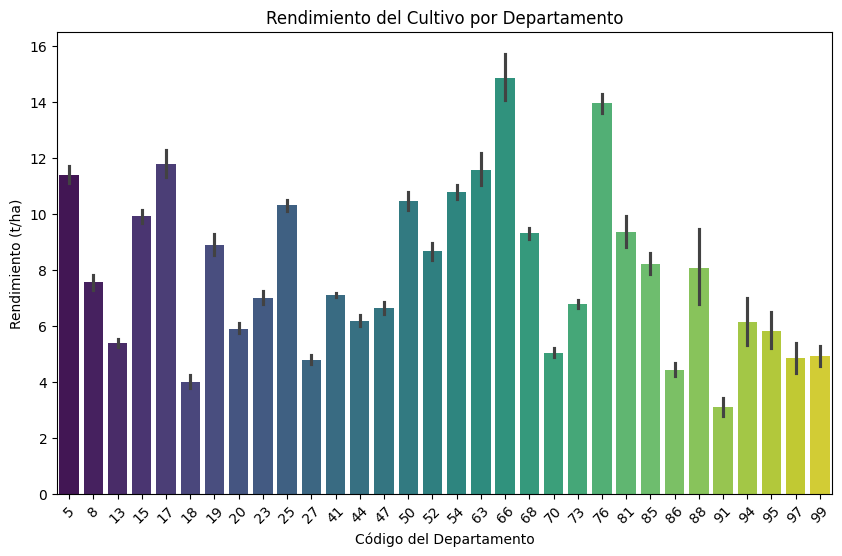

In [11]:
df = df.dropna(subset=['Rendimiento'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='COD_DEP', y='Rendimiento', palette='viridis')
plt.title('Rendimiento del Cultivo por Departamento')
plt.xlabel('Código del Departamento')
plt.ylabel('Rendimiento (t/ha)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-5d39cb00db33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_seleccionado, x='COD_DEP', y='Produccion', palette='viridis')


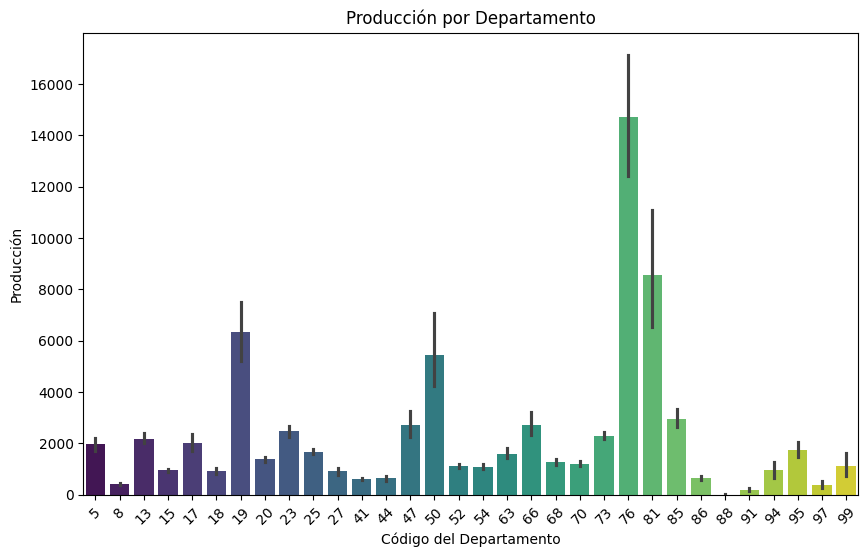

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_seleccionado, x='COD_DEP', y='Produccion', palette='viridis')
plt.title('Producción por Departamento')
plt.xlabel('Código del Departamento')
plt.ylabel('Producción')
plt.xticks(rotation=45)
plt.show()

# Clasificación (con train_test_split)

## DecisionTreeClassifier

In [13]:
df_seleccionado = df_seleccionado.dropna()

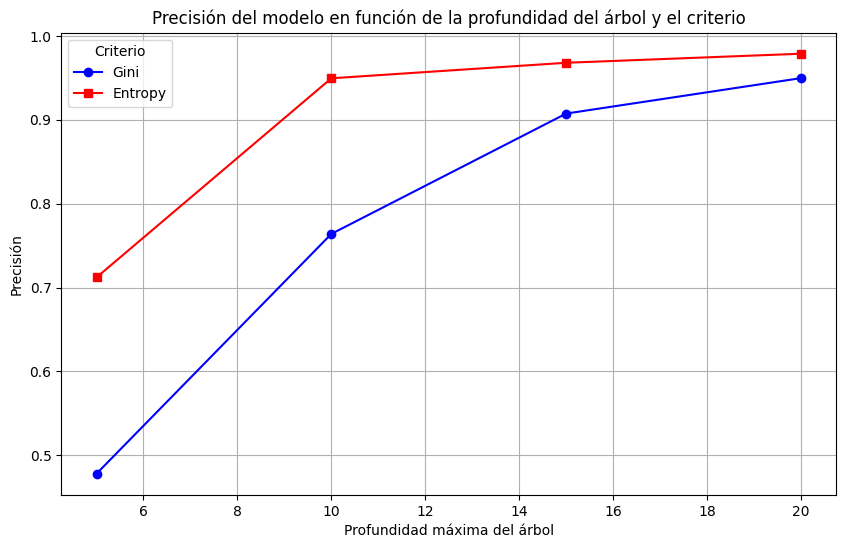

In [ ]:


def decision_tree_classifier(df, max_depth, criterion):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score

    X = df.drop(columns=['Cultivo_encoded'])
    y = df['Cultivo_encoded']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    classifier = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=21)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

max_depth_values = [5, 10, 15, 20]
accuracies_gini = []
accuracies_entropy = []

for depth in max_depth_values:
    accuracy_gini = decision_tree_classifier(df_seleccionado, max_depth=depth, criterion='gini')
    accuracies_gini.append(accuracy_gini)

    accuracy_entropy = decision_tree_classifier(df_seleccionado, max_depth=depth, criterion='entropy')
    accuracies_entropy.append(accuracy_entropy)


plt.figure(figsize=(10,6))
plt.plot(max_depth_values, accuracies_gini, marker='o', color='b', label='Gini')
plt.plot(max_depth_values, accuracies_entropy, marker='s', color='r', label='Entropy')


plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Precisión')
plt.title('Precisión del modelo en función de la profundidad del árbol y el criterio')
plt.legend(title='Criterio', loc='best')
plt.grid(True)
plt.show()


## RandomForestClassifier

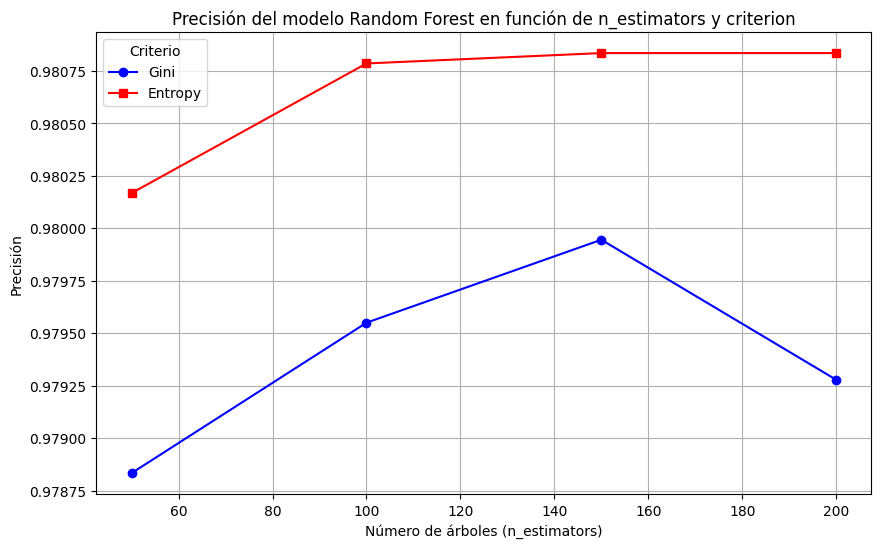

In [ ]:


def random_forest_classifier(df, n_estimators=100, criterion='gini'):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score

    X = df.drop(columns=['Cultivo_encoded'])
    y = df['Cultivo_encoded']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Lista de diferentes valores de n_estimators
n_estimators_values = [50, 100, 150, 200]
accuracies_gini = []
accuracies_entropy = []

for n_estimators in n_estimators_values:
    accuracy_gini = random_forest_classifier(df_seleccionado, n_estimators=n_estimators, criterion='gini')
    accuracies_gini.append(accuracy_gini)

    accuracy_entropy = random_forest_classifier(df_seleccionado, n_estimators=n_estimators, criterion='entropy')
    accuracies_entropy.append(accuracy_entropy)

# Graficar los resultados con líneas
plt.figure(figsize=(10,6))
plt.plot(n_estimators_values, accuracies_gini, marker='o', color='b', label='Gini')
plt.plot(n_estimators_values, accuracies_entropy, marker='s', color='r', label='Entropy')

plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('Precisión')
plt.title('Precisión del modelo Random Forest en función de n_estimators y criterion')
plt.legend(title='Criterio', loc='best')
plt.grid(True)
plt.show()

## SVC

In [ ]:


def svc_classifier(df, kernel='rbf'):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score

    X = df.drop(columns=['Cultivo_encoded'])
    y = df['Cultivo_encoded']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    # Escalar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svc = SVC(kernel=kernel, gamma='scale')
    svc.fit(X_train_scaled, y_train)

    y_pred_scaled = svc.predict(X_test_scaled)
    accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)

    return accuracy_with_scaling


kernels = ['linear', 'rbf', 'poly']

results = []

# Evaluar combinaciones
for kernel in kernels:
    accuracy = svc_classifier(df_seleccionado, kernel=kernel)
    results.append(accuracy)

# Graficar los resultados
plt.figure(figsize=(12, 8))

plt.plot(kernels, results, marker='o')
plt.xlabel('Kernel')
plt.ylabel('Precisión')
plt.title('Precisión del modelo SVC en función del kernel')
plt.grid(True)
plt.xticks(kernels)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing

ConversionError: Failed to convert value(s) to axis units: ['scale', 'auto', 0.1, 1]

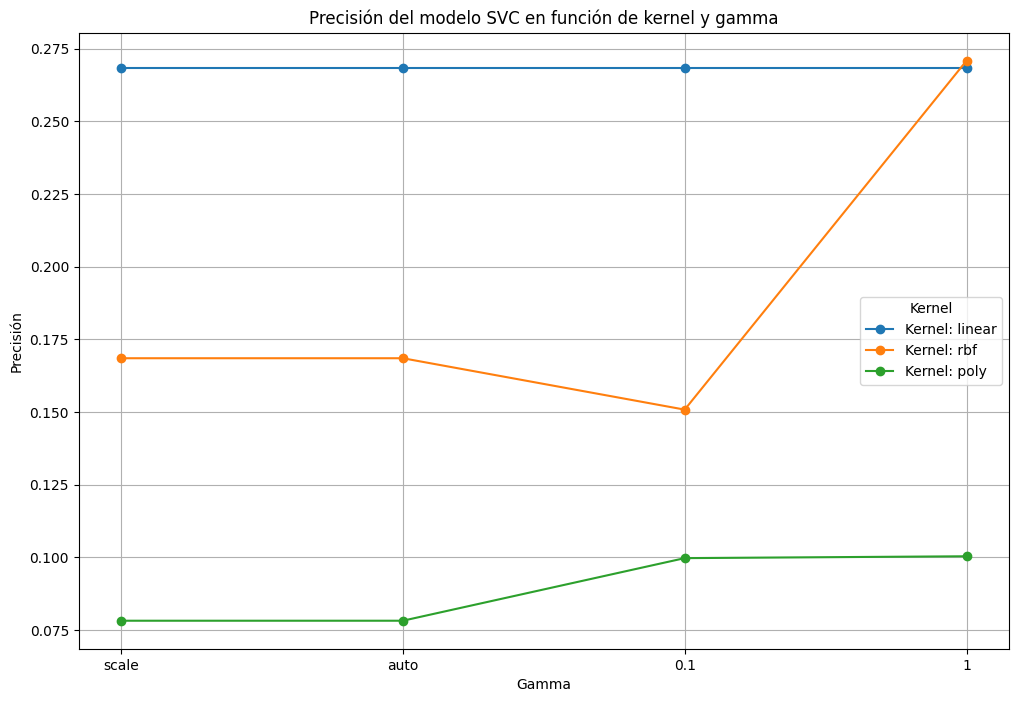

In [ ]:


def svc_classifier(df, kernel='rbf', gamma='scale'):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score

    X = df.drop(columns=['Cultivo_encoded'])
    y = df['Cultivo_encoded']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    # Escalar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Crear el modelo SVC
    svc = SVC(kernel=kernel, gamma=gamma, max_iter=3)
    svc.fit(X_train_scaled, y_train)

    y_pred_scaled = svc.predict(X_test_scaled)
    accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)

    return accuracy_with_scaling


kernels = ['linear', 'rbf', 'poly']
gammas = ['scale', 'auto', 0.1, 1]

results = []

# Evaluar combinaciones
for kernel in kernels:
    accuracies = []
    for gamma in gammas:
        accuracy = svc_classifier(df_seleccionado, kernel=kernel, gamma=gamma)
        accuracies.append(accuracy)
    results.append(accuracies)

# Graficar los resultados
plt.figure(figsize=(12, 8))

for i, kernel in enumerate(kernels):
    plt.plot(gammas, results[i], marker='o', label=f'Kernel: {kernel}')

plt.xlabel('Gamma')
plt.ylabel('Precisión')
plt.title('Precisión del modelo SVC en función de kernel y gamma')
plt.legend(title='Kernel', loc='best')
plt.grid(True)
plt.xticks(gammas)
plt.show()


# Clasificacion(cross_val_score)

DecisionTreeClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


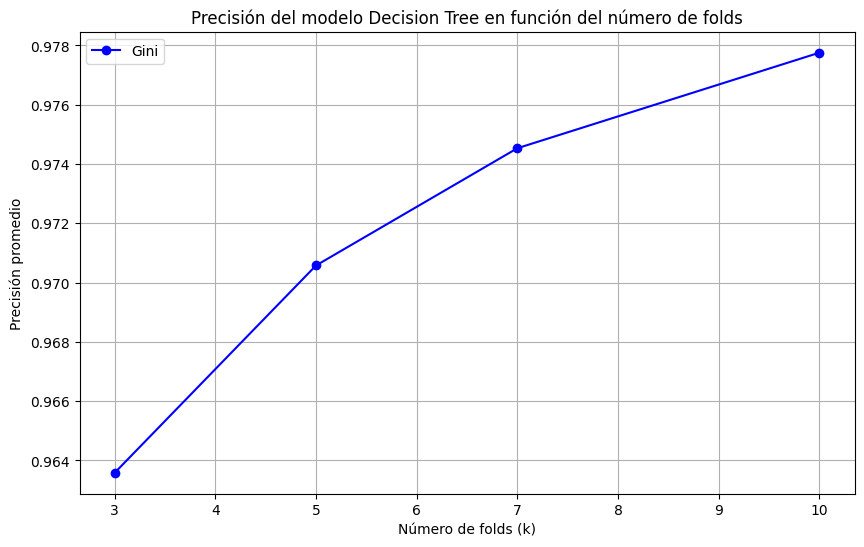

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def decision_tree_cross_validation(df, folds):
    X = df.drop(columns=['Cultivo_encoded', 'Rendimiento'])  # Variables independientes
    y = df['Cultivo_encoded']  # Variable objetivo

    # Clasificador con parámetros fijos
    classifier = DecisionTreeClassifier(random_state=21)

    # Validación cruzada
    scores = cross_val_score(classifier, X, y, cv=folds, scoring='accuracy')
    mean_accuracy = scores.mean()

    return mean_accuracy

# Lista de diferentes números de folds
fold_values = [3, 5, 7, 10]
accuracies = []

# Ejecutar el modelo para diferentes números de folds
for folds in fold_values:
    accuracy = decision_tree_cross_validation(df_seleccionado, folds=folds)
    accuracies.append(accuracy)

# Graficar los resultados con líneas
plt.figure(figsize=(10, 6))
plt.plot(fold_values, accuracies, marker='o', color='b', label='Gini')

plt.xlabel('Número de folds (k)')
plt.ylabel('Precisión promedio')
plt.title('Precisión del modelo Decision Tree en función del número de folds')
plt.legend(loc='best')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


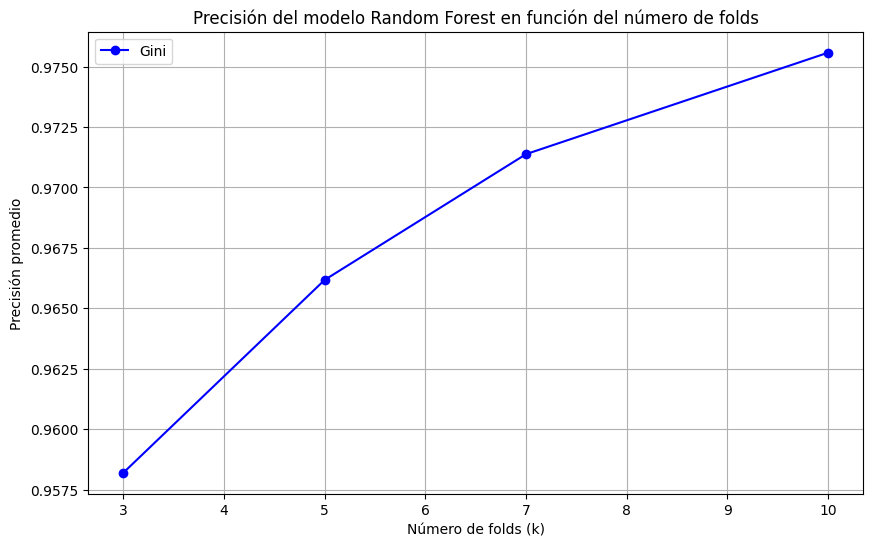

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def random_forest_cross_validation(df, folds):
    X = df.drop(columns=['Cultivo_encoded', 'Rendimiento'])
    y = df['Cultivo_encoded']

    # Clasificador con parámetros fijos
    classifier = RandomForestClassifier(random_state=21)

    # Validación cruzada
    scores = cross_val_score(classifier, X, y, cv=folds)
    mean_accuracy = scores.mean()

    return mean_accuracy

# Lista de diferentes números de folds
fold_values = [3, 5, 7, 10]
accuracies = []

# Ejecutar el modelo para diferentes números de folds
for folds in fold_values:
    accuracy = random_forest_cross_validation(df_seleccionado, folds=folds)
    accuracies.append(accuracy)

# Graficar los resultados con líneas
plt.figure(figsize=(10, 6))
plt.plot(fold_values, accuracies, marker='o', color='b', label='Gini')

plt.xlabel('Número de folds (k)')
plt.ylabel('Precisión promedio')
plt.title('Precisión del modelo Random Forest en función del número de folds')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

def svc_cross_validation(df, folds):
    X = df.drop(columns=['Cultivo_encoded', 'Rendimiento'])
    y = df['Cultivo_encoded']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    classifier = SVC(random_state=21)

    scores = cross_val_score(classifier, X_scaled, y, cv=folds, scoring='accuracy')
    mean_accuracy = scores.mean()

    return mean_accuracy

# Lista de diferentes números de folds
fold_values = [3, 5, 7, 10]
accuracies = []

for folds in fold_values:
    accuracy = svc_cross_validation(df_seleccionado, folds=folds)
    accuracies.append(accuracy)

# Graficar los resultados con líneas
plt.figure(figsize=(10, 6))
plt.plot(fold_values, accuracies, marker='o', color='b', label='SVC')

plt.xlabel('Número de folds (k)')
plt.ylabel('Precisión promedio')
plt.title('Precisión del modelo SVC en función del número de folds')
plt.legend(loc='best')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.datasets import load_iris

# Cargar un conjunto de datos de ejemplo

X = df_seleccionado.drop(columns=['Cultivo_encoded', 'Rendimiento'])
y = df_seleccionado['Cultivo_encoded']

# Definir la función para mostrar la curva de validación
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2, 10,2)
    for nfolds in nfolds_range:
        # Validación cruzada con KFold y cálculo del rendimiento
        s = cross_val_score(
            est, X, y,
            cv=KFold(n_splits=nfolds, shuffle=True, random_state=42),
            scoring=make_scorer(accuracy_score)
        )
        means.append(np.mean(s))
        stds.append(np.std(s))

    # Convertir a arreglos numpy
    means = np.array(means)
    stds = np.array(stds)

    # Crear la gráfica
    plt.figure(figsize=(8, 6))
    plt.plot(nfolds_range, means, label="Mean Accuracy", color="black", linestyle="-", marker="o")
    plt.fill_between(nfolds_range, means - stds, means + stds, color="blue", alpha=0.2, label="Std Dev")
    plt.title("Validation Curve for DecisionTreeClassifier")
    plt.xlabel("Number of Folds (n)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()



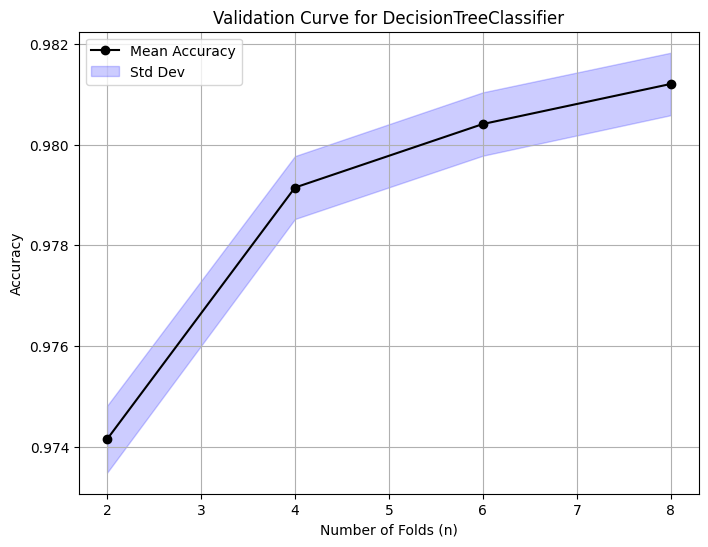

In [ ]:
est = DecisionTreeClassifier(random_state=42)
show_curve(est)

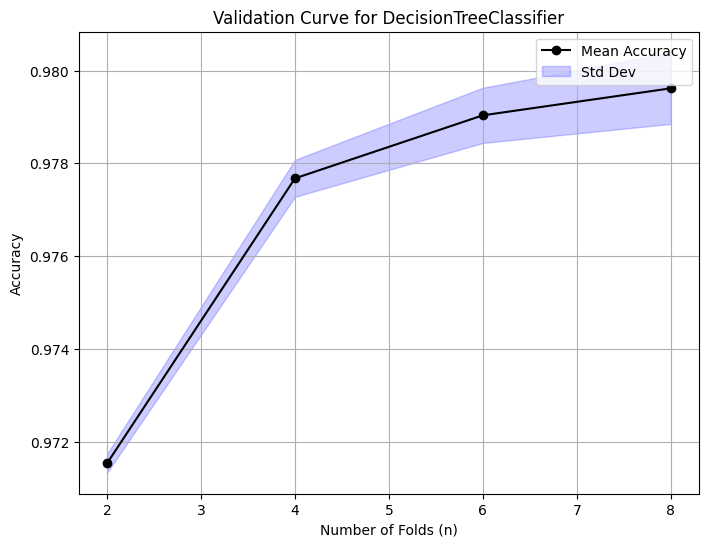

In [ ]:
est1 = RandomForestClassifier(random_state=42)
show_curve(est1)

In [ ]:
from sklearn.svm import SVC
est2 = SVC(random_state=42)

# Mostrar la curva de validación
show_curve(est2)

Información del DataFrame original:
<class 'pandas.core.frame.DataFrame'>
Index: 202442 entries, 0 to 206067
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   COD_DEP           202442 non-null  int64  
 1   COD_MUN           202442 non-null  int64  
 2   Grupo_encoded     202442 non-null  int64  
 3   Subgrupo_encoded  202442 non-null  int64  
 4   Cultivo_encoded   202442 non-null  int64  
 5   Area_Sembrada     202442 non-null  int64  
 6   Area_Cosechada    202442 non-null  int64  
 7   Produccion        202442 non-null  int64  
 8   Rendimiento       202442 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 15.4 MB
None

Columnas con valores infinitos:
COD_DEP               0
COD_MUN               0
Grupo_encoded         0
Subgrupo_encoded      0
Cultivo_encoded       0
Area_Sembrada         0
Area_Cosechada        0
Produccion            0
Rendimiento         736
dtype: int64
Columns with 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6602 - loss: 1.3633 - val_accuracy: 0.8677 - val_loss: 0.4206
Epoch 2/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8642 - loss: 0.3928 - val_accuracy: 0.8537 - val_loss: 0.3782
Epoch 3/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8925 - loss: 0.3034 - val_accuracy: 0.9110 - val_loss: 0.2483
Epoch 4/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9046 - loss: 0.2652 - val_accuracy: 0.8986 - val_loss: 0.2651
Epoch 5/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9118 - loss: 0.2390 - val_accuracy: 0.9199 - val_loss: 0.2135
Epoch 6/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9178 - loss: 0.2247 - val_accuracy: 0.9331 - val_loss: 0.1915
Epoch 7/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9216 - loss: 0.2126 - val_accuracy: 0.9220 - val_loss: 0.2079
Epoch 8/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9215 - loss: 0

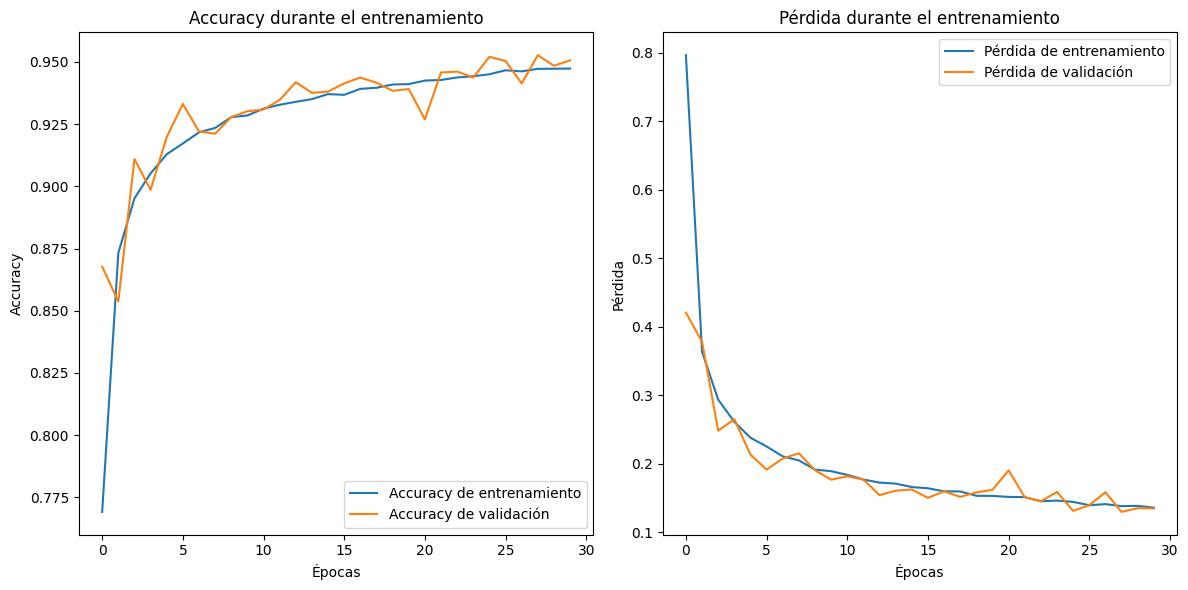


Distribución de clases después del filtrado:
Cultivo_encoded
132    24904
99     14663
206     9640
219     9464
178     9017
       ...  
182        2
72         2
180        2
129        2
198        2
Name: count, Length: 211, dtype: int64


In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def clean_dataframe(df):
    """
    Clean the dataframe by:
    1. Handling infinite values in Rendimiento column
    2. Replacing infinite values with NaN
    3. Handling NaN values
    """
    # Create a copy to avoid modifying the original DataFrame
    df_cleaned = df.copy()

    # Replace infinite values with NaN specifically in the Rendimiento column
    df_cleaned['Rendimiento'] = df_cleaned['Rendimiento'].replace([np.inf, -np.inf], np.nan)

    # Print columns with NaN values
    print("Columns with NaN values:")
    print(df_cleaned.isna().sum())

    # Fill NaN values with column median
    df_cleaned['Rendimiento'] = df_cleaned['Rendimiento'].fillna(df_cleaned['Rendimiento'].median())

    return df_cleaned

def prepare_mlp_classifier(df):
    # Clean the dataframe first
    df_cleaned = clean_dataframe(df)

    # Contar el número de ejemplos por clase
    class_counts = df_cleaned['Cultivo_encoded'].value_counts()

    # Definir un umbral para eliminar clases con pocos ejemplos
    threshold = 2  # Al menos 2 ejemplos por clase

    # Eliminar las clases con pocos ejemplos
    to_remove = class_counts[class_counts < threshold].index
    print(f"\nClases a eliminar por tener menos de {threshold} ejemplos: {to_remove.tolist()}")

    # Filtrar el dataframe para mantener solo las clases con suficientes ejemplos
    df_filtered = df_cleaned[~df_cleaned['Cultivo_encoded'].isin(to_remove)]

    # Recodificar las etiquetas de las clases para que sean consecutivas
    y_original = df_filtered['Cultivo_encoded']
    unique_classes = sorted(y_original.unique())
    class_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_classes)}

    y = y_original.map(class_mapping)

    # Preparación de datos
    X = df_filtered.drop(columns=['Cultivo_encoded'])

    # Dividir el dataset en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

    # Normalización de características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convertir a float32
    X_train_scaled = X_train_scaled.astype(np.float32)
    X_test_scaled = X_test_scaled.astype(np.float32)

    # Contar número de clases
    num_classes = len(np.unique(y))

    # One-hot encoding de las etiquetas
    y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

    # Definir arquitectura de red neuronal
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu'),  # Primera capa oculta
        tf.keras.layers.Dense(128, activation='relu'),  # Segunda capa oculta
        tf.keras.layers.Dense(64, activation='relu'),   # Tercera capa oculta
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Capa de salida
    ])

    # Compilar modelo
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entrenar modelo
    history = model.fit(
        X_train_scaled, y_train_ohe,
        epochs=30,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Predecir y calcular accuracy
    probs = model.predict(X_test_scaled)
    preds = np.argmax(probs, axis=1)
    accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), preds)

    return {
        'model': model,
        'accuracy': accuracy,
        'history': history.history,
        'filtered_dataframe': df_filtered,
        'class_mapping': class_mapping
    }

# Debugging: Inspect dataframe before processing
print("Información del DataFrame original:")
print(df_seleccionado.info())

# Debugging: Check for infinite values
print("\nColumnas con valores infinitos:")
print(np.isinf(df_seleccionado.select_dtypes(include=[np.number])).sum())

# Ejecutar clasificador MLP
mlp_results = prepare_mlp_classifier(df_seleccionado)

# Imprimir resultados
print(f"\nAccuracy del Perceptrón Multicapa: {mlp_results['accuracy']:.4f}")

# Graficar resultados de entrenamiento
plt.figure(figsize=(12, 6))

# Gráfico de accuracy
plt.subplot(1, 2, 1)
plt.plot(mlp_results['history']['accuracy'], label='Accuracy de entrenamiento')
plt.plot(mlp_results['history']['val_accuracy'], label='Accuracy de validación')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(mlp_results['history']['loss'], label='Pérdida de entrenamiento')
plt.plot(mlp_results['history']['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir distribución de clases después del filtrado
print("\nDistribución de clases después del filtrado:")
print(mlp_results['filtered_dataframe']['Cultivo_encoded'].value_counts())

Información del DataFrame original:
<class 'pandas.core.frame.DataFrame'>
Index: 202442 entries, 0 to 206067
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   COD_DEP           202442 non-null  int64  
 1   COD_MUN           202442 non-null  int64  
 2   Grupo_encoded     202442 non-null  int64  
 3   Subgrupo_encoded  202442 non-null  int64  
 4   Cultivo_encoded   202442 non-null  int64  
 5   Area_Sembrada     202442 non-null  int64  
 6   Area_Cosechada    202442 non-null  int64  
 7   Produccion        202442 non-null  int64  
 8   Rendimiento       202442 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 15.4 MB
None

Columnas con valores infinitos:
COD_DEP               0
COD_MUN               0
Grupo_encoded         0
Subgrupo_encoded      0
Cultivo_encoded       0
Area_Sembrada         0
Area_Cosechada        0
Produccion            0
Rendimiento         736
dtype: int64
Columns with 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.6712 - loss: 1.3030 - val_accuracy: 0.8695 - val_loss: 0.3887
Epoch 2/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.8570 - loss: 0.4031 - val_accuracy: 0.8430 - val_loss: 0.4801
Epoch 3/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - accuracy: 0.8813 - loss: 0.3298 - val_accuracy: 0.8877 - val_loss: 0.3083
Epoch 4/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.8906 - loss: 0.3010 - val_accuracy: 0.9094 - val_loss: 0.2462
Epoch 5/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.8981 - loss: 0.2790 - val_accuracy: 0.9015 - val_loss: 0.2477
Epoch 6/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.9061 - loss: 0.2566 - val_accuracy: 0.9113 - val_loss: 0.2427
Epoch 7/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.9081 - loss: 0.2427 - val_accuracy: 0.9092 - val_loss: 0.2322
Epoch 8/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.9098 - loss: 0

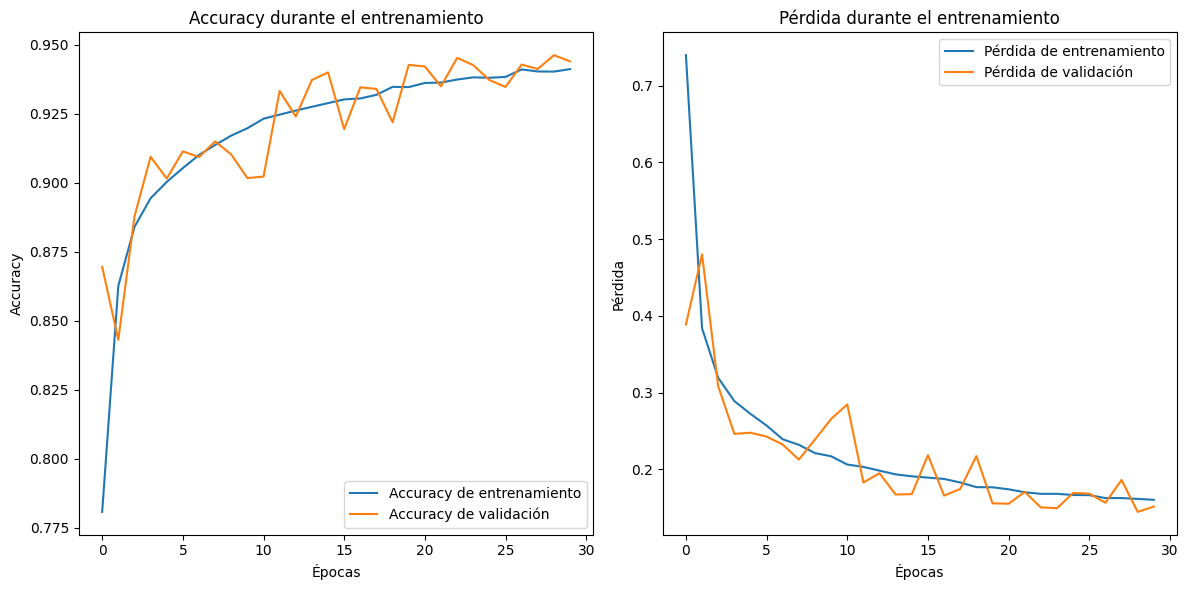


Distribución de clases después del filtrado:
Cultivo_encoded
132    24904
99     14663
206     9640
219     9464
178     9017
       ...  
182        2
72         2
180        2
129        2
198        2
Name: count, Length: 211, dtype: int64


In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def clean_dataframe(df):
    """
    Clean the dataframe by:
    1. Handling infinite values in Rendimiento column
    2. Replacing infinite values with NaN
    3. Handling NaN values
    """
    # Create a copy to avoid modifying the original DataFrame
    df_cleaned = df.copy()

    # Replace infinite values with NaN specifically in the Rendimiento column
    df_cleaned['Rendimiento'] = df_cleaned['Rendimiento'].replace([np.inf, -np.inf], np.nan)

    # Print columns with NaN values
    print("Columns with NaN values:")
    print(df_cleaned.isna().sum())

    # Fill NaN values with column median
    df_cleaned['Rendimiento'] = df_cleaned['Rendimiento'].fillna(df_cleaned['Rendimiento'].median())

    return df_cleaned

def prepare_mlp_classifier(df):
    # Clean the dataframe first
    df_cleaned = clean_dataframe(df)

    # Contar el número de ejemplos por clase
    class_counts = df_cleaned['Cultivo_encoded'].value_counts()

    # Definir un umbral para eliminar clases con pocos ejemplos
    threshold = 2  # Al menos 2 ejemplos por clase

    # Eliminar las clases con pocos ejemplos
    to_remove = class_counts[class_counts < threshold].index
    print(f"\nClases a eliminar por tener menos de {threshold} ejemplos: {to_remove.tolist()}")

    # Filtrar el dataframe para mantener solo las clases con suficientes ejemplos
    df_filtered = df_cleaned[~df_cleaned['Cultivo_encoded'].isin(to_remove)]

    # Recodificar las etiquetas de las clases para que sean consecutivas
    y_original = df_filtered['Cultivo_encoded']
    unique_classes = sorted(y_original.unique())
    class_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_classes)}

    y = y_original.map(class_mapping)

    # Preparación de datos
    X = df_filtered.drop(columns=['Cultivo_encoded'])

    # Dividir el dataset en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

    # Normalización de características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convertir a float32
    X_train_scaled = X_train_scaled.astype(np.float32)
    X_test_scaled = X_test_scaled.astype(np.float32)

    # Contar número de clases
    num_classes = len(np.unique(y))

    # One-hot encoding de las etiquetas
    y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

    # Definir arquitectura de red neuronal con 6 capas
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(512, activation='relu'),  # Primera capa oculta
        tf.keras.layers.Dense(256, activation='relu'),  # Segunda capa oculta
        tf.keras.layers.Dense(128, activation='relu'),  # Tercera capa oculta
        tf.keras.layers.Dense(64, activation='relu'),   # Cuarta capa oculta
        tf.keras.layers.Dense(32, activation='relu'),   # Quinta capa oculta
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Capa de salida
    ])

    # Compilar modelo
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entrenar modelo
    history = model.fit(
        X_train_scaled, y_train_ohe,
        epochs=30,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Predecir y calcular accuracy
    probs = model.predict(X_test_scaled)
    preds = np.argmax(probs, axis=1)
    accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), preds)

    return {
        'model': model,
        'accuracy': accuracy,
        'history': history.history,
        'filtered_dataframe': df_filtered,
        'class_mapping': class_mapping
    }

# Debugging: Inspect dataframe before processing
print("Información del DataFrame original:")
print(df_seleccionado.info())

# Debugging: Check for infinite values
print("\nColumnas con valores infinitos:")
print(np.isinf(df_seleccionado.select_dtypes(include=[np.number])).sum())

# Ejecutar clasificador MLP
mlp_results = prepare_mlp_classifier(df_seleccionado)

# Imprimir resultados
print(f"\nAccuracy del Perceptrón Multicapa: {mlp_results['accuracy']:.4f}")

# Graficar resultados de entrenamiento
plt.figure(figsize=(12, 6))

# Gráfico de accuracy
plt.subplot(1, 2, 1)
plt.plot(mlp_results['history']['accuracy'], label='Accuracy de entrenamiento')
plt.plot(mlp_results['history']['val_accuracy'], label='Accuracy de validación')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(mlp_results['history']['loss'], label='Pérdida de entrenamiento')
plt.plot(mlp_results['history']['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir distribución de clases después del filtrado
print("\nDistribución de clases después del filtrado:")
print(mlp_results['filtered_dataframe']['Cultivo_encoded'].value_counts())

Información del DataFrame original:
<class 'pandas.core.frame.DataFrame'>
Index: 202442 entries, 0 to 206067
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   COD_DEP           202442 non-null  int64  
 1   COD_MUN           202442 non-null  int64  
 2   Grupo_encoded     202442 non-null  int64  
 3   Subgrupo_encoded  202442 non-null  int64  
 4   Cultivo_encoded   202442 non-null  int64  
 5   Area_Sembrada     202442 non-null  int64  
 6   Area_Cosechada    202442 non-null  int64  
 7   Produccion        202442 non-null  int64  
 8   Rendimiento       202442 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 15.4 MB
None

Columnas con valores infinitos:
COD_DEP               0
COD_MUN               0
Grupo_encoded         0
Subgrupo_encoded      0
Cultivo_encoded       0
Area_Sembrada         0
Area_Cosechada        0
Produccion            0
Rendimiento         736
dtype: int64
Columns with 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 78s 18ms/step - accuracy: 0.4000 - loss: 2.3624 - val_accuracy: 0.7094 - val_loss: 0.9897
Epoch 2/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - accuracy: 0.7081 - loss: 0.9379 - val_accuracy: 0.8017 - val_loss: 0.6489
Epoch 3/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 73s 18ms/step - accuracy: 0.7939 - loss: 0.6629 - val_accuracy: 0.7946 - val_loss: 0.6733
Epoch 4/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 80s 18ms/step - accuracy: 0.8212 - loss: 0.5794 - val_accuracy: 0.8335 - val_loss: 0.5246
Epoch 5/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 83s 18ms/step - accuracy: 0.8375 - loss: 0.5370 - val_accuracy: 0.8429 - val_loss: 0.4549
Epoch 6/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 73s 18ms/step - accuracy: 0.8510 - loss: 0.4656 - val_accuracy: 0.8869 - val_loss: 0.3420
Epoch 7/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 71s 17ms/step - accuracy: 0.8685 - loss: 0.3931 - val_accuracy: 0.8808 - val_loss: 0.3360
Epoch 8/30
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 81s 17ms/step - accuracy: 0.8780 -

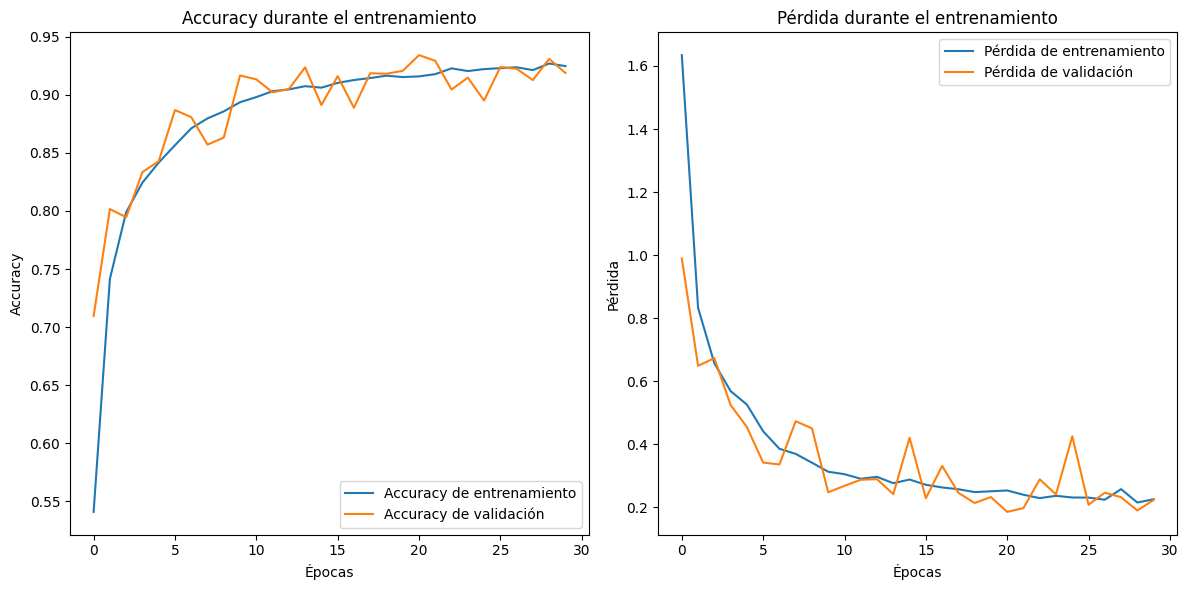


Distribución de clases después del filtrado:
Cultivo_encoded
132    24904
99     14663
206     9640
219     9464
178     9017
       ...  
182        2
72         2
180        2
129        2
198        2
Name: count, Length: 211, dtype: int64


In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def clean_dataframe(df):
    """
    Clean the dataframe by:
    1. Handling infinite values in Rendimiento column
    2. Replacing infinite values with NaN
    3. Handling NaN values
    """
    # Create a copy to avoid modifying the original DataFrame
    df_cleaned = df.copy()

    # Replace infinite values with NaN specifically in the Rendimiento column
    df_cleaned['Rendimiento'] = df_cleaned['Rendimiento'].replace([np.inf, -np.inf], np.nan)

    # Print columns with NaN values
    print("Columns with NaN values:")
    print(df_cleaned.isna().sum())

    # Fill NaN values with column median
    df_cleaned['Rendimiento'] = df_cleaned['Rendimiento'].fillna(df_cleaned['Rendimiento'].median())

    return df_cleaned

def prepare_mlp_classifier(df):
    # Clean the dataframe first
    df_cleaned = clean_dataframe(df)

    # Contar el número de ejemplos por clase
    class_counts = df_cleaned['Cultivo_encoded'].value_counts()

    # Definir un umbral para eliminar clases con pocos ejemplos
    threshold = 2  # Al menos 2 ejemplos por clase

    # Eliminar las clases con pocos ejemplos
    to_remove = class_counts[class_counts < threshold].index
    print(f"\nClases a eliminar por tener menos de {threshold} ejemplos: {to_remove.tolist()}")

    # Filtrar el dataframe para mantener solo las clases con suficientes ejemplos
    df_filtered = df_cleaned[~df_cleaned['Cultivo_encoded'].isin(to_remove)]

    # Recodificar las etiquetas de las clases para que sean consecutivas
    y_original = df_filtered['Cultivo_encoded']
    unique_classes = sorted(y_original.unique())
    class_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_classes)}

    y = y_original.map(class_mapping)

    # Preparación de datos
    X = df_filtered.drop(columns=['Cultivo_encoded'])

    # Dividir el dataset en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

    # Normalización de características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convertir a float32
    X_train_scaled = X_train_scaled.astype(np.float32)
    X_test_scaled = X_test_scaled.astype(np.float32)

    # Contar número de clases
    num_classes = len(np.unique(y))

    # One-hot encoding de las etiquetas
    y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

    # Definir arquitectura de red neuronal con 10 capas
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(1024, activation='relu'),  # Primera capa oculta
        tf.keras.layers.Dense(512, activation='relu'),   # Segunda capa oculta
        tf.keras.layers.Dense(256, activation='relu'),   # Tercera capa oculta
        tf.keras.layers.Dense(128, activation='relu'),   # Cuarta capa oculta
        tf.keras.layers.Dense(64, activation='relu'),    # Quinta capa oculta
        tf.keras.layers.Dense(32, activation='relu'),    # Sexta capa oculta
        tf.keras.layers.Dense(16, activation='relu'),    # Séptima capa oculta
        tf.keras.layers.Dense(8, activation='relu'),     # Octava capa oculta
        tf.keras.layers.Dense(4, activation='relu'),     # Novena capa oculta
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Capa de salida
    ])

    # Compilar modelo
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entrenar modelo
    history = model.fit(
        X_train_scaled, y_train_ohe,
        epochs=30,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Predecir y calcular accuracy
    probs = model.predict(X_test_scaled)
    preds = np.argmax(probs, axis=1)
    accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), preds)

    return {
        'model': model,
        'accuracy': accuracy,
        'history': history.history,
        'filtered_dataframe': df_filtered,
        'class_mapping': class_mapping
    }

# Debugging: Inspect dataframe before processing
print("Información del DataFrame original:")
print(df_seleccionado.info())

# Debugging: Check for infinite values
print("\nColumnas con valores infinitos:")
print(np.isinf(df_seleccionado.select_dtypes(include=[np.number])).sum())

# Ejecutar clasificador MLP
mlp_results = prepare_mlp_classifier(df_seleccionado)

# Imprimir resultados
print(f"\nAccuracy del Perceptrón Multicapa: {mlp_results['accuracy']:.4f}")

# Graficar resultados de entrenamiento
plt.figure(figsize=(12, 6))

# Gráfico de accuracy
plt.subplot(1, 2, 1)
plt.plot(mlp_results['history']['accuracy'], label='Accuracy de entrenamiento')
plt.plot(mlp_results['history']['val_accuracy'], label='Accuracy de validación')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(mlp_results['history']['loss'], label='Pérdida de entrenamiento')
plt.plot(mlp_results['history']['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir distribución de clases después del filtrado
print("\nDistribución de clases después del filtrado:")
print(mlp_results['filtered_dataframe']['Cultivo_encoded'].value_counts())